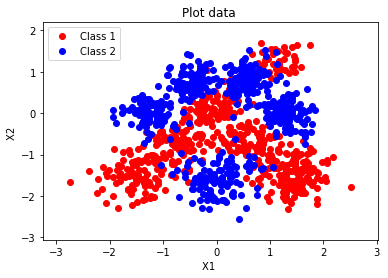

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DataPlot import *
from logisticCode import*
%matplotlib inline

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# Question c; visualize the dataset; 
plot_data(X, y)

In [2]:
# Question d; split the dataset into training and test sets
# Pre-processing data
#X_train, y_train, X_test, y_test = splitData(X, y)
X_train = np.loadtxt('X_train')
y_train = np.loadtxt('y_train').reshape(800,1)
X_test = np.loadtxt('X_test')
y_test = np.loadtxt('y_test').reshape(200,1)

In [22]:
#np.savetxt('X_train', X_train)
#np.savetxt('X_test', X_test)
#np.savetxt('y_train', y_train)
#np.savetxt('y_test', y_test)

In [5]:
# Question e; define functions for training
logistic_train = Logistic(X_train, y_train)
weights, record = logistic_train.train(0.001, 100)

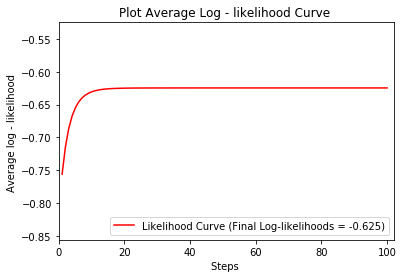

In [6]:
llTrain = logistic_train.logLikelihood(record)

plot_ll(llTrain)

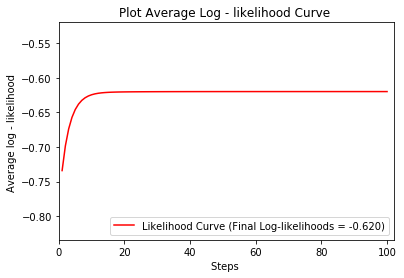

In [26]:
logistic_test = Logistic(X_test, y_test)
llTest = logistic_test.logLikelihood(record)
plot_ll(llTest)

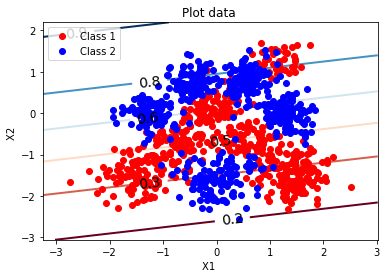

In [27]:
# a predict function

plot_predictive_distribution(X, y, sigmoid, weights)

In [28]:
# Question f: Confusion matrix
print(confMatrix(X_test, y_test, weights, 0.5))

[[ 0.69811321  0.30188679]
 [ 0.26595745  0.73404255]]


In [9]:
# Question g: ROC curve

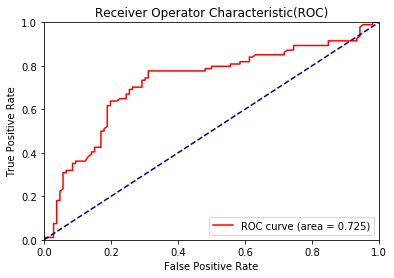

In [29]:
plot_ROC(X_test, y_test, weights)

In [11]:
# Question h; RBFs

In [30]:
def RBF_test(l, learnRate, iterations):
    X_RBF_train = expand_inputs(l, X_train, X_train)
    X_RBF_test = expand_inputs(l, X_test, X_train)

    lo_RBF_train = Logistic(X_RBF_train, y_train)
    weights, record = lo_RBF_train.train(learnRate, iterations)

    ll_RBF_train = lo_RBF_train.logLikelihood(record)
    plot_ll(ll_RBF_train)

    lo_RBF_test = Logistic(X_RBF_test, y_test)
    ll_RBF_test = lo_RBF_test.logLikelihood(record)
    plot_ll(ll_RBF_test)

    plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, l, X_train, weights)
    print(confMatrix(X_RBF_test, y_test, weights, 0.5))

    plot_ROC(X_RBF_test, y_test, weights)
    #return weights

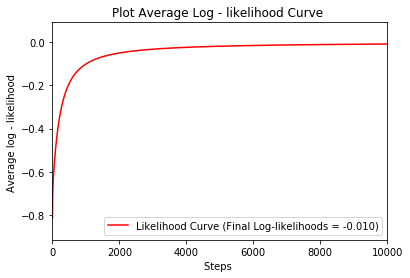

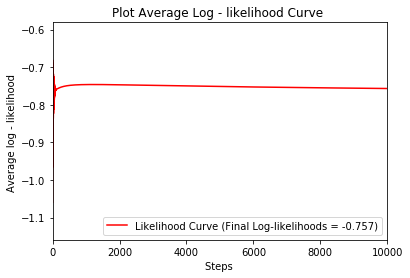

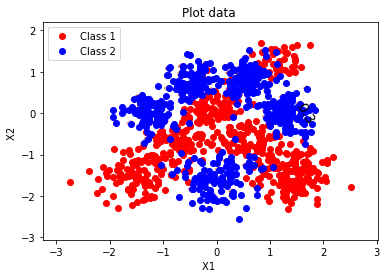

[[ 0.98113208  0.01886792]
 [ 0.88297872  0.11702128]]


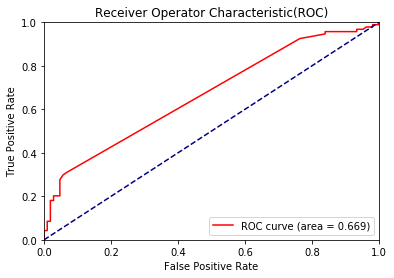

In [75]:
RBF_test(0.01, 0.01, 10000)

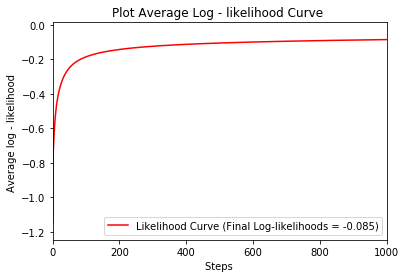

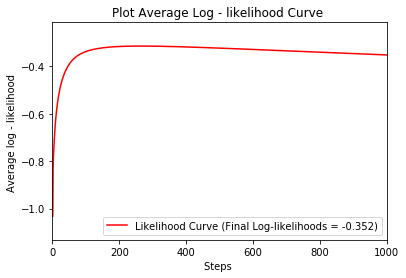

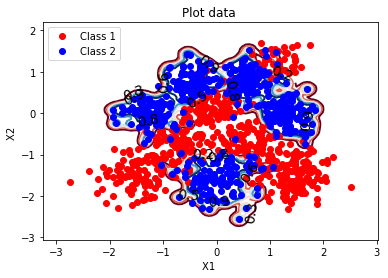

[[ 0.86792453  0.13207547]
 [ 0.17021277  0.82978723]]


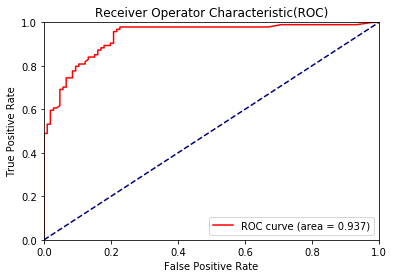

In [63]:
RBF_test(0.1, 0.01, 1000)

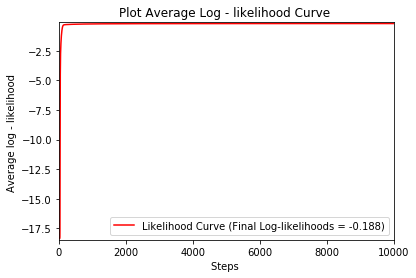

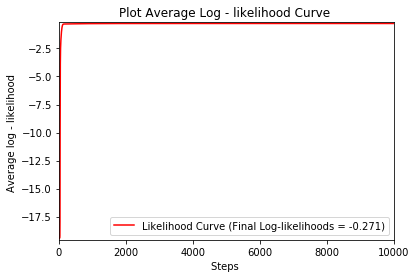

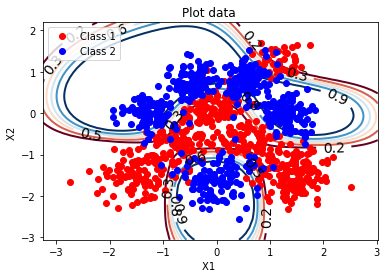

[[ 0.87735849  0.12264151]
 [ 0.06382979  0.93617021]]


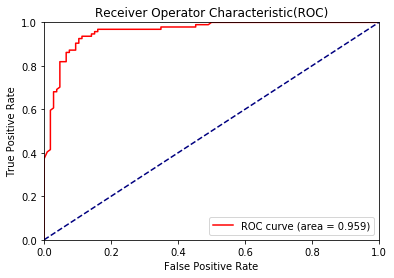

In [59]:
RBF_test(1, 0.0002, 10000)

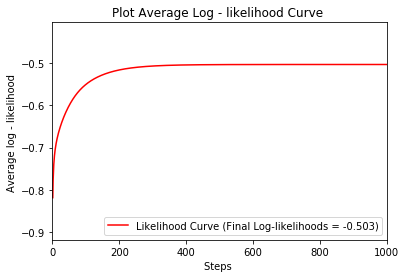

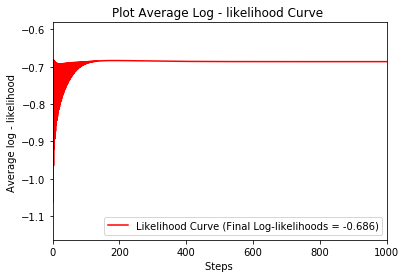

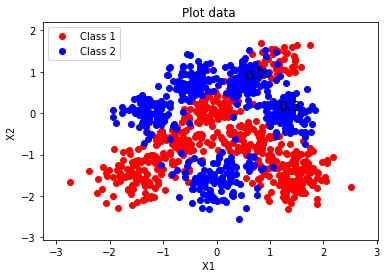

[[ 0.96226415  0.03773585]
 [ 0.79787234  0.20212766]]


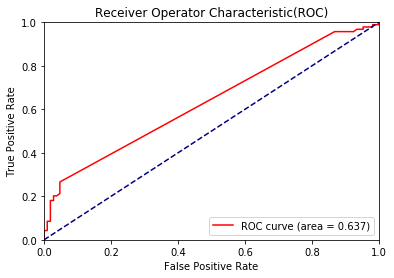

In [67]:
#question j     
def RBF_test_MAP(l, learnRate, iterations):
    X_RBF_train = expand_inputs(l, X_train, X_train)
    X_RBF_test = expand_inputs(l, X_test, X_train)

    lo_RBF_train = Logistic_MAP(X_RBF_train, y_train)
    weights, record = lo_RBF_train.train(learnRate, iterations)

    ll_RBF_train = lo_RBF_train.logLikelihood(record)
    plot_ll(ll_RBF_train)

    lo_RBF_test = Logistic_MAP(X_RBF_test, y_test)
    ll_RBF_test = lo_RBF_test.logLikelihood(record)
    plot_ll(ll_RBF_test)

    plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, l, X_train, weights)
    print(confMatrix(X_RBF_test, y_test, weights, 0.5))

    plot_ROC(X_RBF_test, y_test, weights)
    
    
RBF_test_MAP(0.01, 0.01, 1000)

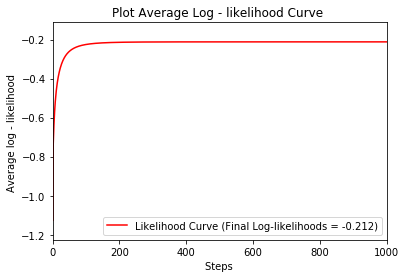

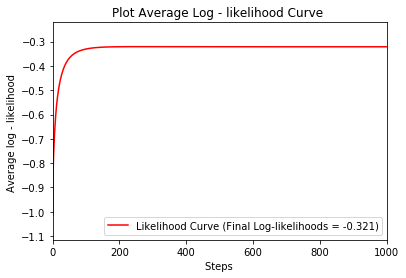

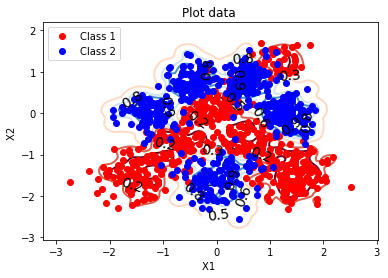

[[ 0.88679245  0.11320755]
 [ 0.08510638  0.91489362]]


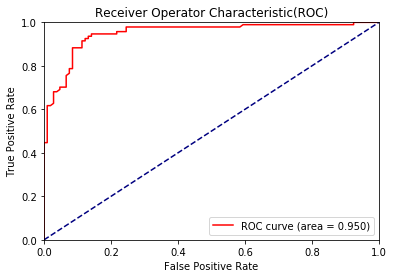

In [68]:
RBF_test_MAP(0.1, 0.01, 1000)

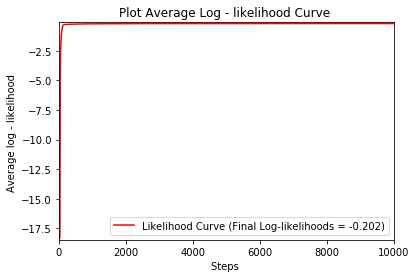

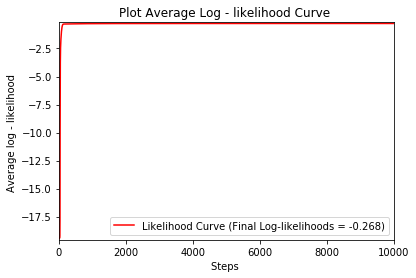

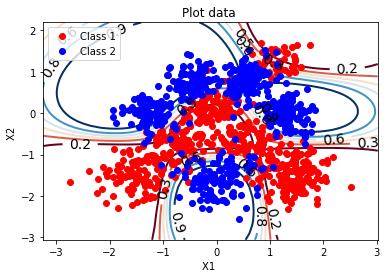

[[ 0.87735849  0.12264151]
 [ 0.07446809  0.92553191]]


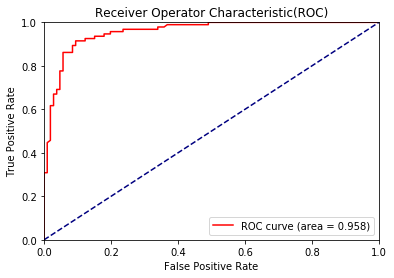

In [76]:
RBF_test_MAP(1, 0.0002, 10000)

In [38]:
import scipy
from scipy import optimize

X_opt_train = expand_inputs(0.1, X_train, X_train)
X_opt_test = expand_inputs(0.1, X_test, X_train)
y_opt_train = y_train.reshape(-1)
y_opt_test = y_test.reshape(-1)
w0 = np.ones((X_opt_train.shape[1]+1, 1))
beta_MAP = scipy.optimize.fmin_l_bfgs_b(func, w0, grad, args = (X_opt_train, y_opt_train, 1))[0]

In [39]:
import math 

def laplace(X_test, X_train, y_train, sigma):
    w0 = np.ones((X_train.shape[1]+1, 1))
    wMAP = scipy.optimize.fmin_l_bfgs_b(func, w0, grad, args = (X_train, y_train, sigma))[0]
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    s = sig(np.dot(X_train, wMAP))
    sa = np.eye(s.shape[0])* (s * (1 - s))
    Sn = 1/sigma * np.eye(wMAP.shape[0]) + np.dot(np.dot(X_train.T, sa), X_train)
    L = np.linalg.cholesky(Sn)
    L_x = scipy.linalg.solve_triangular(L, X_test.T)
    va = np.diag(np.dot(L_x.T, L_x))
    ua = np.dot(X_test, wMAP)
    k = np.power((1 + math.pi * va / 8 ), -1/2)
    return sig(k * ua), np.linalg.det(Sn)

def logLike(prediction, labels):
    ll = np.log(np.power(prediction,  labels)) + np.log(np.power((1 - prediction), (1 - labels)))
    return np.mean(ll)

In [45]:
BY = laplace(X_opt_test, X_opt_train, y_opt_train, 1)[0]
MAP = sigmoid(X_opt_test, beta_MAP)
BY_t = laplace(X_opt_train, X_opt_train, y_opt_train, 1)[0]
MAP_t= sigmoid(X_opt_train, beta_MAP)
print('BY FINAL TEST',logLike(BY, y_opt_test))
print('MAP FINAL TEST',logLike(MAP, y_opt_test))
print('BY FINAL Train',logLike(BY_t, y_opt_train))
print('MAP FINAL Train',logLike(MAP_t, y_opt_train))

BY FINAL TEST -0.362608422271
MAP FINAL TEST -0.321096985302
BY FINAL TEST -0.27946874586
MAP FINAL TEST -0.211655914055


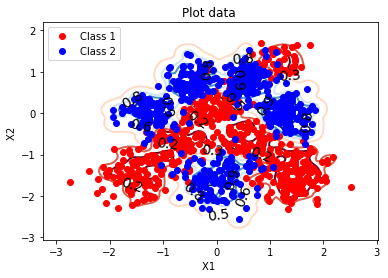

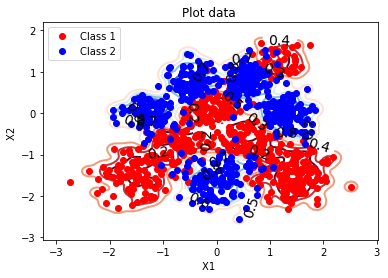

[[ 0.88679245  0.11320755]
 [ 0.08510638  0.91489362]]
[[ 0.88679245  0.11320755]
 [ 0.08510638  0.91489362]]


In [43]:
plot_predictive_distribution_expand(X, y, sigmoid, expand_inputs, 0.1, X_train, beta_MAP)
plot_predictive_distribution_laplace(X, y, laplace, 0.1, X_train, y_opt_train, 1)

print(confMatrix_prd(MAP, y_opt_test, 0.5))
print(confMatrix_prd(BY, y_opt_test, 0.5))

In [41]:
def modelEvidence(wMAP, X_train, y_train, sigma):
    d = wMAP.shape[0]
    s = sigmoid(X_train, wMAP)
    lnLL = np.sum(np.log(np.power(s, y_train)) + np.log(np.power((1 - s),(1-y_train))))
    det = laplace(X_train, X_train, y_train, sigma)[1]
    Z = lnLL - np.sum(np.power(wMAP,2)/sigma)/2-(d/2)*np.log(sigma) - np.log(det)/2
    return Z
    

In [8]:
#search
def gridSearch(X_train, y_train):
    y_train = y_train.reshape(-1)
    w0 = np.ones((X_train.shape[0]+1, 1))
    s_range = [0.6, 0.8, 1, 1.2, 1.4]
    l_range = [0.3, 0.4, 0.5, 0.6, 0.7]
    for l in l_range:
        X_exp_train = expand_inputs(l, X_train, X_train)
        X_exp_test = expand_inputs(l, X_test, X_train) 
        for s in s_range:
            wMAP = scipy.optimize.fmin_l_bfgs_b(func, w0, grad, args = (X_exp_train, y_train, s))[0]
            evi = modelEvidence(wMAP, X_exp_train, y_train, s)
            print('when l= %f, sigma = %f, model evidence = %f' %(l, s, evi))

                  
gridSearch(X_train, y_train)            


when l= 0.300000, sigma = 0.600000, model evidence = -193.346893
when l= 0.300000, sigma = 0.800000, model evidence = -192.883549
when l= 0.300000, sigma = 1.000000, model evidence = -193.041686
when l= 0.300000, sigma = 1.200000, model evidence = -193.466696
when l= 0.300000, sigma = 1.400000, model evidence = -194.016249
when l= 0.400000, sigma = 0.600000, model evidence = -185.036227
when l= 0.400000, sigma = 0.800000, model evidence = -185.476678
when l= 0.400000, sigma = 1.000000, model evidence = -186.239343
when l= 0.400000, sigma = 1.200000, model evidence = -187.105712
when l= 0.400000, sigma = 1.400000, model evidence = -187.995328
when l= 0.500000, sigma = 0.600000, model evidence = -181.872909
when l= 0.500000, sigma = 0.800000, model evidence = -182.153191
when l= 0.500000, sigma = 1.000000, model evidence = -182.737197
when l= 0.500000, sigma = 1.200000, model evidence = -183.427684
when l= 0.500000, sigma = 1.400000, model evidence = -184.147988


/Users/TY/Documents/GitHub/MLSALT1_CW1/logisticCode.py:66: RuntimeWarning: overflow encountered in exp
  s = 1.0 / (1.0 + np.exp(-np.dot(X_aug, weights)))


when l= 0.600000, sigma = 0.600000, model evidence = -181.988364
when l= 0.600000, sigma = 0.800000, model evidence = -181.799090
when l= 0.600000, sigma = 1.000000, model evidence = -182.023309
when l= 0.600000, sigma = 1.200000, model evidence = -182.418493
when l= 0.600000, sigma = 1.400000, model evidence = -182.881524
when l= 0.700000, sigma = 0.600000, model evidence = -184.723612
when l= 0.700000, sigma = 0.800000, model evidence = -183.672309
when l= 0.700000, sigma = 1.000000, model evidence = -183.300021
when l= 0.700000, sigma = 1.200000, model evidence = -183.249590
when l= 0.700000, sigma = 1.400000, model evidence = -183.367212


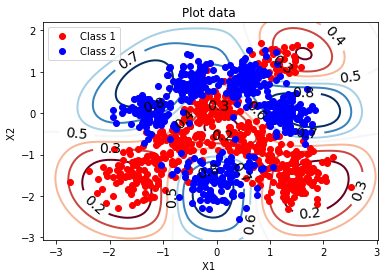

In [33]:
plot_predictive_distribution_laplace(X, y, laplace, 0.6, X_train, y_opt_train, 0.8)

In [57]:
X_tune_train = expand_inputs(0.6, X_train, X_train)
X_tune_test = expand_inputs(0.6, X_test, X_train)
BY_tune = laplace(X_tune_test, X_tune_train, y_opt_train, 0.8)[0]
print(confMatrix_prd(BY_tune, y_opt_test, 0.5))

[[ 0.88679245  0.11320755]
 [ 0.05319149  0.94680851]]


In [56]:
BY_tune = laplace(X_tune_test, X_tune_train, y_opt_train, 0.8)[0]
print('BY FINAL TEST',logLike(BY_tune, y_opt_test))
BY_tune = laplace(X_tune_train, X_tune_train, y_opt_train, 0.8)[0]
print('BY FINAL Train',logLike(BY_tune, y_opt_train))

/Users/TY/Documents/GitHub/MLSALT1_CW1/logisticCode.py:66: RuntimeWarning: overflow encountered in exp
  s = 1.0 / (1.0 + np.exp(-np.dot(X_aug, weights)))


BY FINAL TEST -0.418089094595
BY FINAL Train -0.394591737144
